Project Question-

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region medical insurance is calculated . 

Columns-

• age: age of primary beneficiary

• sex: insurance contractor gender, female, male 

• bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9. 

• children: Number of children covered by health insurance / Number of dependents

• smoker: Smoking 

• region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. • charges: Individual medical costs billed by health insurance

Prediction : Can you accurately predict insurance costs?

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Loading the dataset 
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We can see that there are 1338 rows and 7 colums from which charges will be our dependent/target variable

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From above we see that there are no null values present in the data.

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From above details we see that -
1) Mean and Median(50%) are almost the same so the data is not skewed in any way,except in the charges column but as it is our target column we will not remove skewness from it.
2) There is a big difference in 75% and max values so outliers may be present in the data.
3) Standard deviation can also be judged from the above data.


In [17]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

From above we see that there are three categorical columns, so we will use transform then into numerical datatype

In [18]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'no':0,'yes':1}},inplace=True)
df.replace({'region':{'northwest':0, 'northeast':1,'southeast':2,'southwest':3}},inplace=True)

In [19]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


Now checking for categorical columns using bivariate graphs

<Axes: xlabel='sex', ylabel='count'>

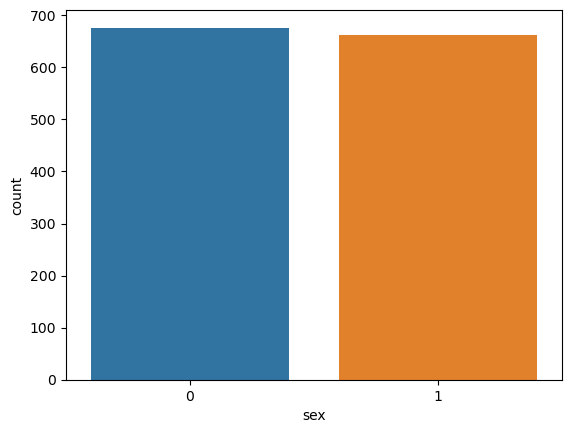

In [20]:
sb.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

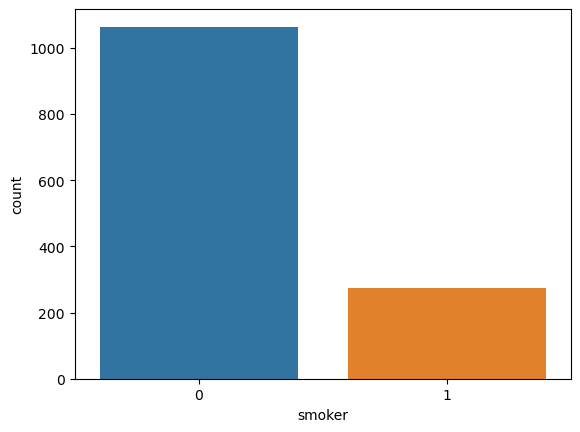

In [21]:
sb.countplot(x=df['smoker'])

<Axes: xlabel='region', ylabel='count'>

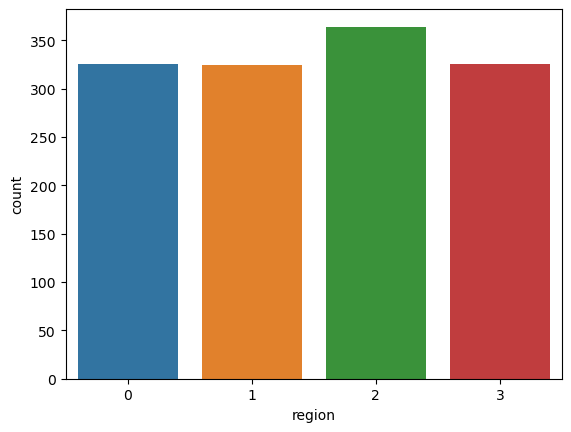

In [22]:
sb.countplot(x=df['region'])

Now checking the correlation netween every variable


In [24]:
dfc=df.corr()
dfc

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.003243,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.007974,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.156686,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.001907,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.013246,0.787251
region,0.003243,-0.007974,0.156686,-0.001907,0.013246,1.000000,0.011741
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.011741,1.000000


<Axes: >

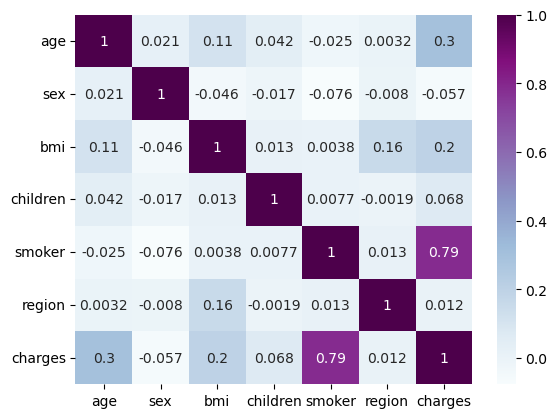

In [27]:
sb.heatmap(dfc,cmap='BuPu',annot=True)

From above we can see that being a smoker , age, and bmi all have high correlation with the charges as compared to other variables

Now checking for correlation using graphs (Data visualization)

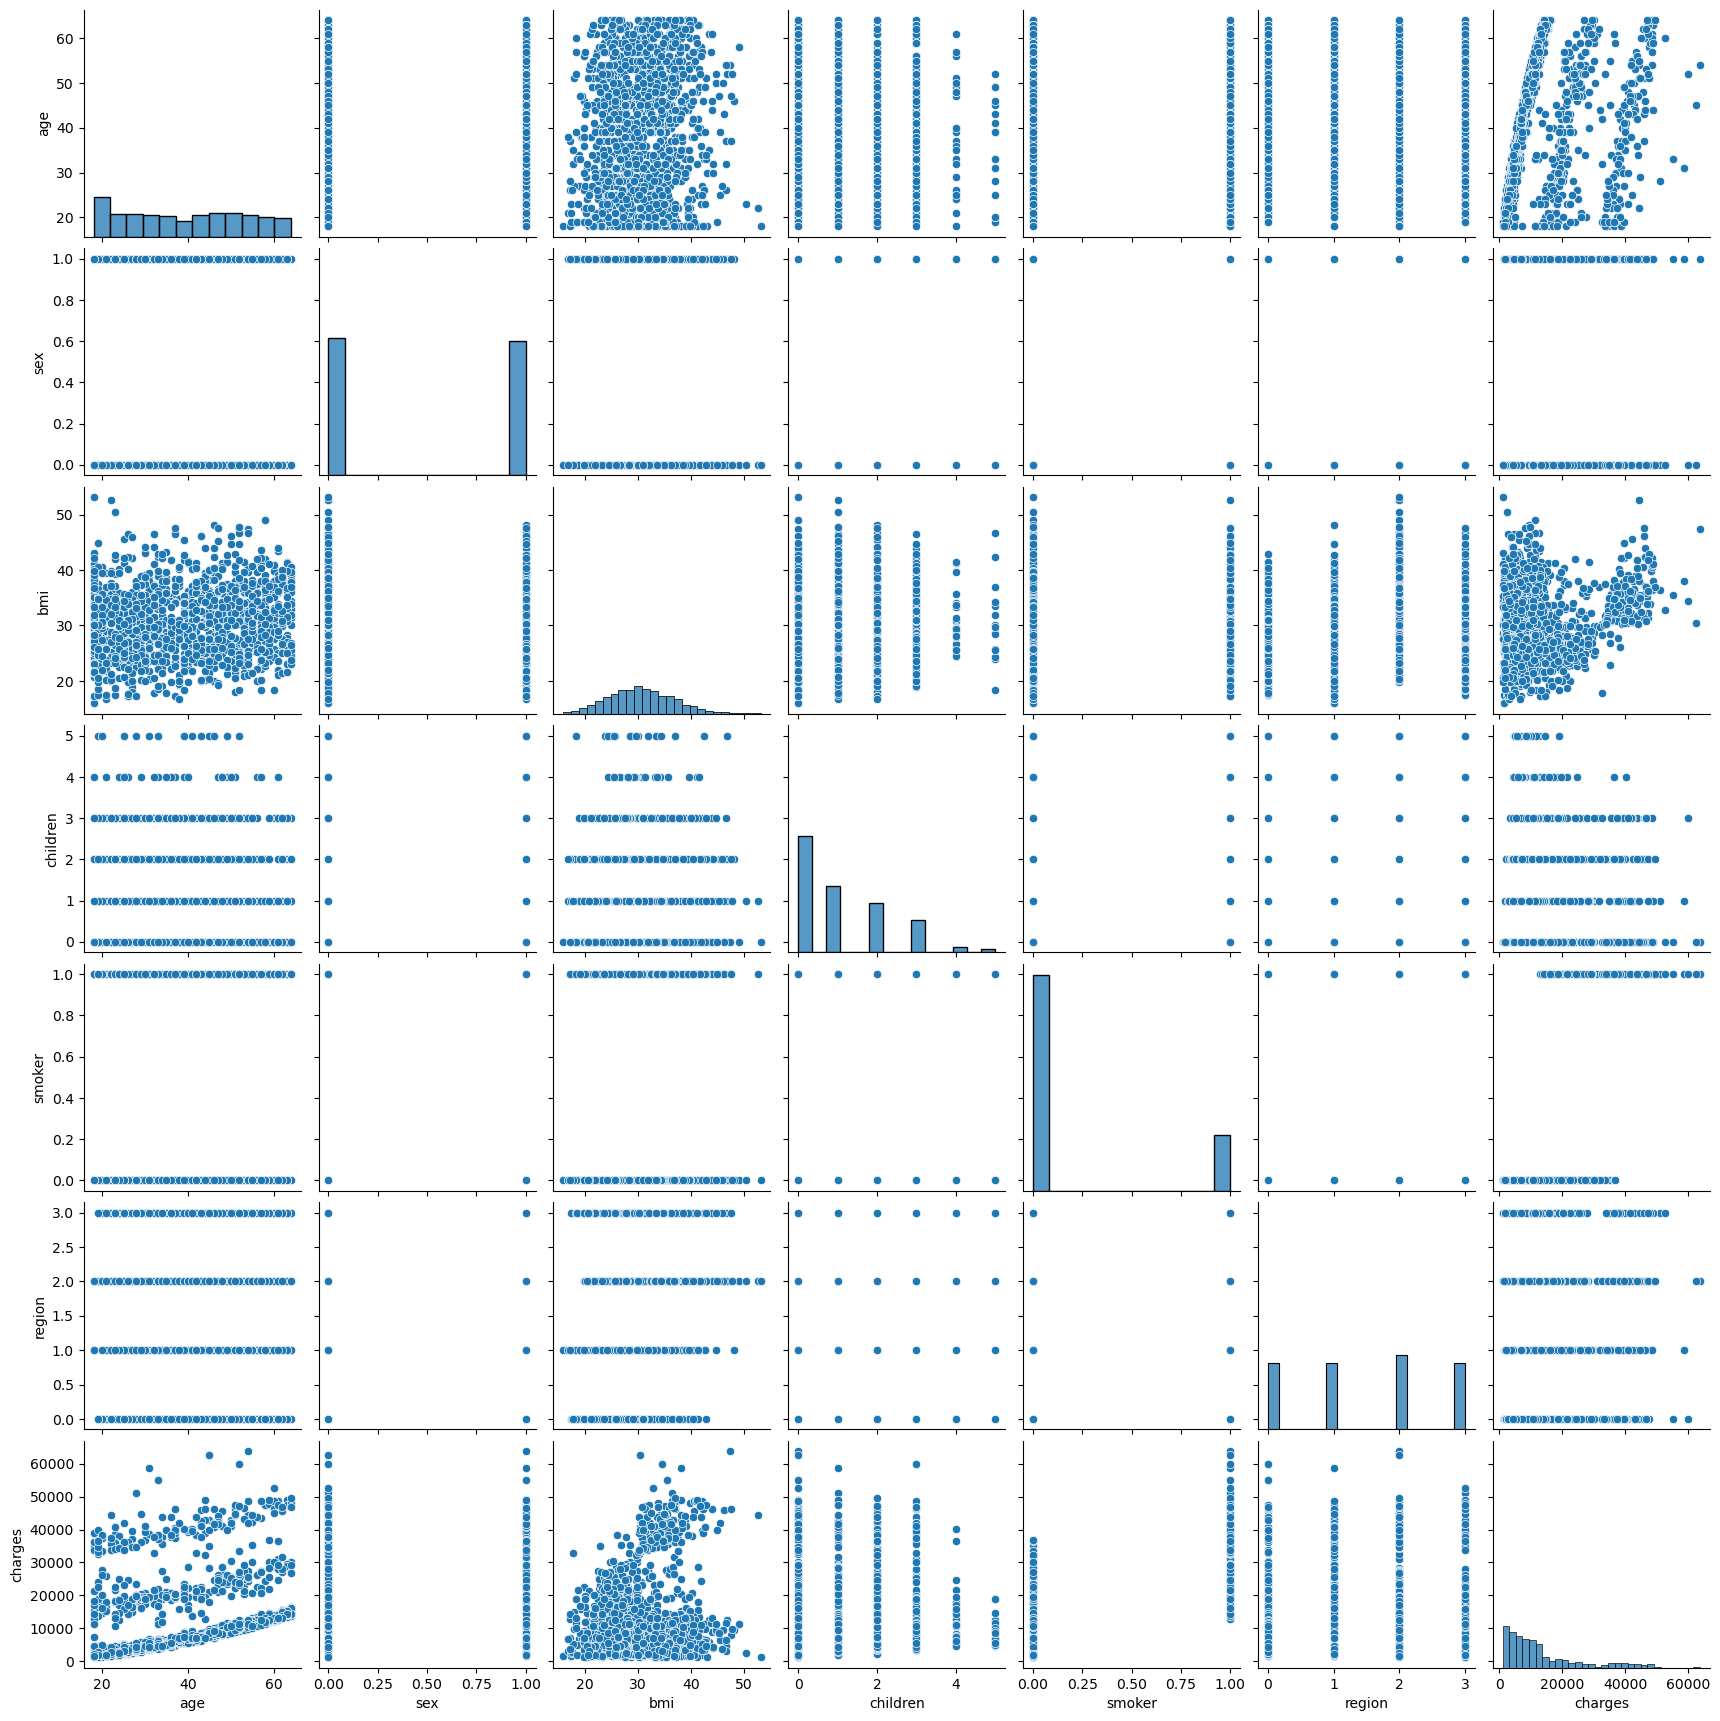

In [33]:
sb.pairplot(data=df)

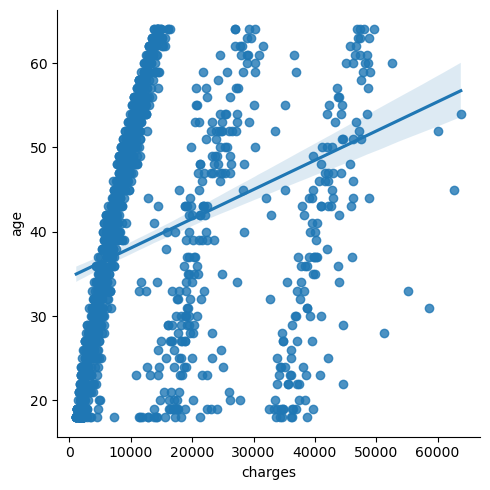

In [37]:
sb.lmplot(x='charges',y='age', data=df)

from above observation we se that there is a positive relation between charges and age of a person

<Axes: title={'center': 'bmi & Charge'}, xlabel='bmi', ylabel='charges'>

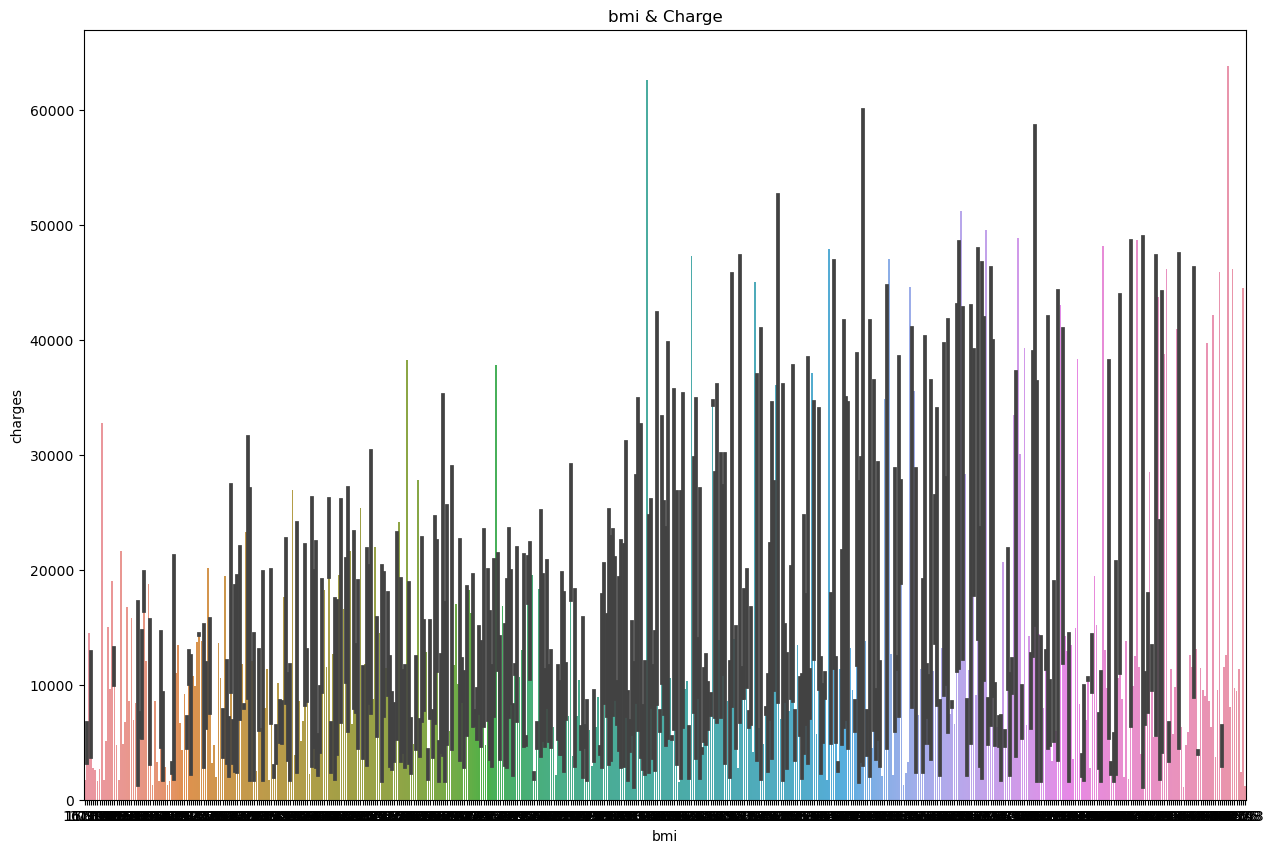

In [31]:
pt.figure(figsize=(15,10))
pt.title('bmi & Charge')
sb.barplot(x='bmi',y='charges',data=df)

We can see that as BMI increases charges also increases hence a positive relation is there

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

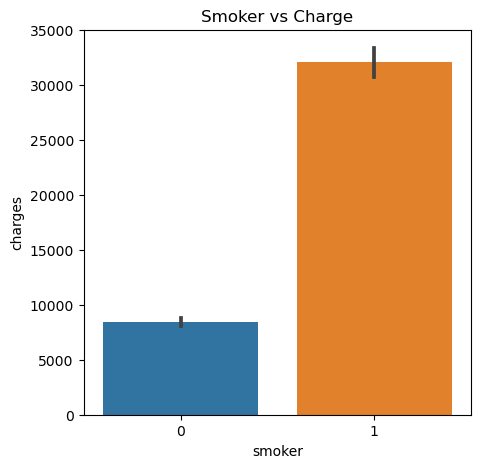

In [32]:
pt.figure(figsize=(5,5))
pt.title('Smoker vs Charge')
sb.barplot(x='smoker',y='charges',data=df)

We can see that being a smoker leads to more insurance charges

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='sex', ylabel='charges'>

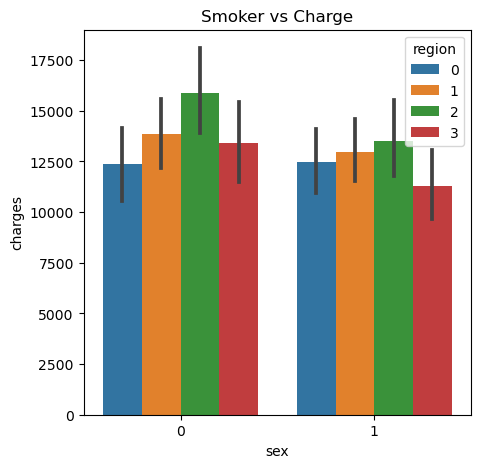

In [38]:
pt.figure(figsize=(5,5))
pt.title('Smoker vs Charge')
sb.barplot(x='sex',y='charges',hue='region',data=df)

From above we can see that neither region nor sex has major influence on insurance charges

Now, we will check for skewness in the data using skew method and figures

In [39]:
df.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.037853
charges     1.515880
dtype: float64

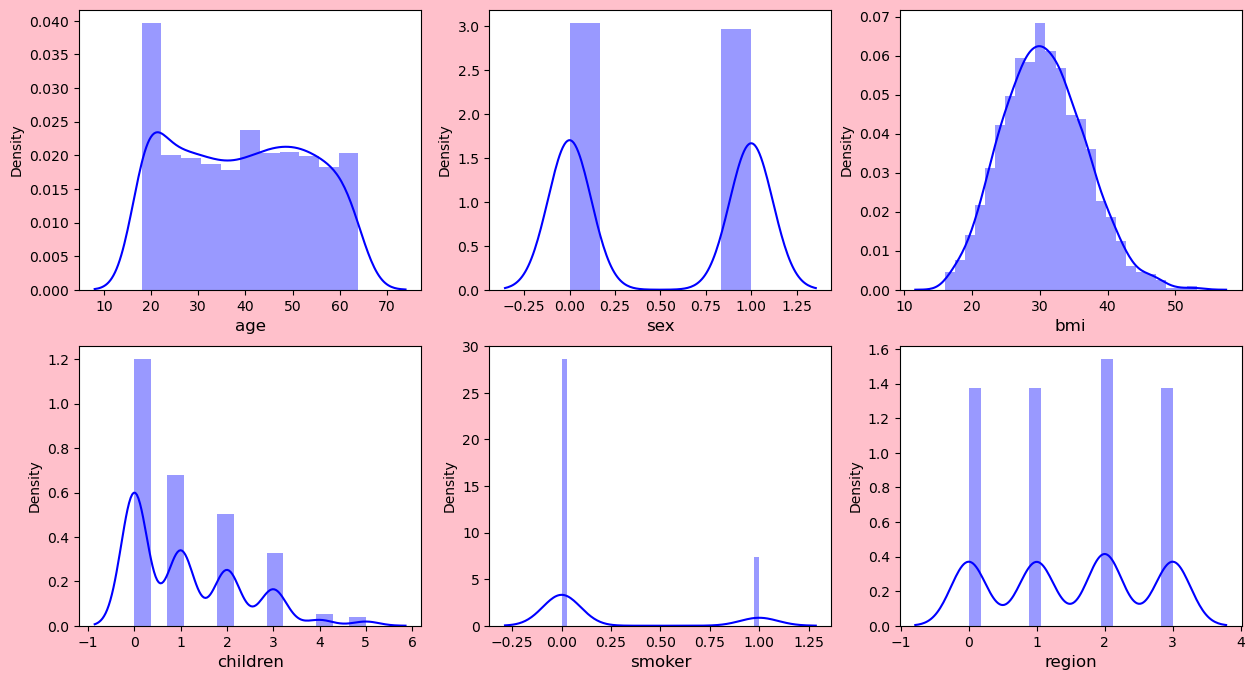

In [44]:
pt.figure(figsize=(15,8),facecolor='pink')
pn=1
for c in df:
    if pn<=6:
        a=pt.subplot(2,3,pn)
        sb.distplot(df[c],color='b')
        pt.xlabel(c,fontsize=12)
        pt.yticks(rotation=0,fontsize=10)
    pn+=1

From above we can see that skewness is present in only smoker and children data but we wont be removing skewness from them as it is considered as categorical data

Now we will seperate the independent and dependent variable for linear regression

In [46]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

In [47]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,0
4,32,0,28.880,0,0,0
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0
1334,18,1,31.920,0,0,1
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,3


In [48]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Importing linear regression model

In [90]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=32)

Training the model

In [91]:
lr= LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [92]:
ypred = lr.predict(xtest)

In [93]:
from sklearn.metrics import mean_squared_error, r2_score

In [95]:
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print('Root mean squared error=',(np.sqrt(mse)))

Mean Squared Error: 28985507.162605707
R-squared: 0.7971975355764205
Root mean squared error= 5383.819012801759


Now saving the model in a user defined function

In [102]:
def linear_regress(x):
    array=np.asarray(x)

    reshaped=array.reshape(1,-1)

    prediction=lr.predict(reshaped)

    print("The Insurance cost is",prediction[0])

In [105]:
linear_regress([52,0,28.54,2,1,3])

The Insurance cost is 34467.08144897137


Hence now, we can predict the insurance cost using this user defined function but sending in the required details